In [1]:
import numpy as np
import matplotlib
import pandas as pd

In [2]:
dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

In [3]:
print(dataset)

          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
834  10/5/2020   WE9                 41.7176                 -83.4239   
835  10/5/2020  WE16                 41.6599                 -83.1468   
836  10/5/2020  WE13                 41.7436                 -83.1526   
837  10/5/2020  WE12                 41.7040                 -83.2552   
838  10/5/2020   WE4                 41.8267                 -83.1947   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                 1.6                  18.5   
1                 1.0        

In [4]:
train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)

          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [5]:
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)

(743, 11)
(743, 1)


In [6]:
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)

(96, 11)
(96, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
import tensorflow as tf

2024-07-05 13:06:08.330660: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from numpy import absolute
from numpy import mean
from numpy import std

In [10]:
model = Ridge(alpha=0.01)
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

In [11]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [12]:
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print(search)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Ridge(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_absolute_error')


In [13]:
results = search.fit(X_train, Y_train)
print(results)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Ridge(alpha=0.01), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])},
             scoring='neg_mean_absolute_error')


In [14]:
model.fit(X_train_scaled,Y_train)

Ridge(alpha=0.01)

In [15]:
res = model.predict(X_test_scaled)
print(res)

[[  9.83387669]
 [ 27.36880876]
 [ 24.6059636 ]
 [ 41.19872646]
 [ 38.43777042]
 [ 49.62314227]
 [ 28.865505  ]
 [ 26.53496755]
 [ 14.85323494]
 [ 55.57719226]
 [ -9.06042499]
 [ 50.64836118]
 [ 18.04907579]
 [ 37.4462099 ]
 [ 25.95803767]
 [ 49.03898783]
 [  8.17669623]
 [ 48.67479023]
 [ 30.4951421 ]
 [ 39.41792655]
 [ 11.67413075]
 [ 51.53057167]
 [  6.68092548]
 [ 18.54493119]
 [ 23.26649961]
 [ 21.65613459]
 [ 54.15545254]
 [ 34.29890299]
 [ 53.54872246]
 [ 27.62244029]
 [ 30.69340485]
 [ 48.32397869]
 [ 12.00218747]
 [ 62.03862382]
 [ 40.73719601]
 [ 60.13230691]
 [ 19.88981712]
 [ 21.47198802]
 [ 46.65564127]
 [  7.14193701]
 [ 49.81351285]
 [ 38.3826334 ]
 [ 71.24812019]
 [ 38.9456388 ]
 [ 33.61410805]
 [ 34.00449614]
 [ 19.48394261]
 [ 43.22266102]
 [ 34.79708891]
 [ 67.08116043]
 [ 29.8847545 ]
 [ 24.31961742]
 [ 22.10183773]
 [ 17.45357703]
 [ 41.77214068]
 [ 38.95524269]
 [ 53.18921662]
 [ 31.02776735]
 [ 14.21760782]
 [ 38.69858735]
 [ 18.82070256]
 [ 38.76178065]
 [ 27.74

In [16]:
print(Y_test)

[[29.9 ]
 [29.9 ]
 [ 1.53]
 [12.71]
 [21.54]
 [12.93]
 [12.9 ]
 [ 6.43]
 [10.83]
 [36.61]
 [ 1.86]
 [31.98]
 [11.43]
 [52.65]
 [ 7.87]
 [47.71]
 [10.54]
 [44.72]
 [12.61]
 [35.36]
 [14.3 ]
 [58.5 ]
 [ 4.64]
 [12.82]
 [10.81]
 [16.77]
 [64.22]
 [32.91]
 [66.79]
 [ 2.8 ]
 [24.77]
 [37.49]
 [ 3.56]
 [39.39]
 [15.67]
 [45.11]
 [14.5 ]
 [14.5 ]
 [21.39]
 [ 5.13]
 [43.03]
 [21.  ]
 [89.02]
 [31.28]
 [18.66]
 [19.5 ]
 [ 8.1 ]
 [45.37]
 [43.53]
 [96.43]
 [14.22]
 [12.49]
 [11.47]
 [12.79]
 [28.47]
 [18.85]
 [54.34]
 [13.85]
 [ 9.4 ]
 [17.49]
 [ 7.08]
 [41.6 ]
 [19.71]
 [38.09]
 [21.65]
 [ 8.65]
 [22.36]
 [ 3.47]
 [29.51]
 [26.78]
 [32.63]
 [22.69]
 [18.27]
 [25.42]
 [ 6.57]
 [ 8.27]
 [ 5.16]
 [28.08]
 [12.19]
 [24.83]
 [22.62]
 [ 0.77]
 [ 8.07]
 [11.42]
 [16.64]
 [ 4.25]
 [ 9.91]
 [ 6.15]
 [ 4.37]
 [ 9.95]
 [ 6.79]
 [ 9.98]
 [ 6.36]
 [ 3.91]
 [ 9.65]
 [ 1.74]]


In [17]:
from sklearn.metrics import r2_score 

In [18]:
r2 = r2_score(Y_test, res) 
print(r2)

0.41931506252206197


In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
mae = mean_absolute_error(Y_test,res)
print(mae)

11.609201556987108


In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

1.3638240370953916


In [22]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

13.948409204102658


In [23]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [24]:
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
explainer = shap.LinearExplainer(model, X_train)
values = explainer.shap_values(X_train)


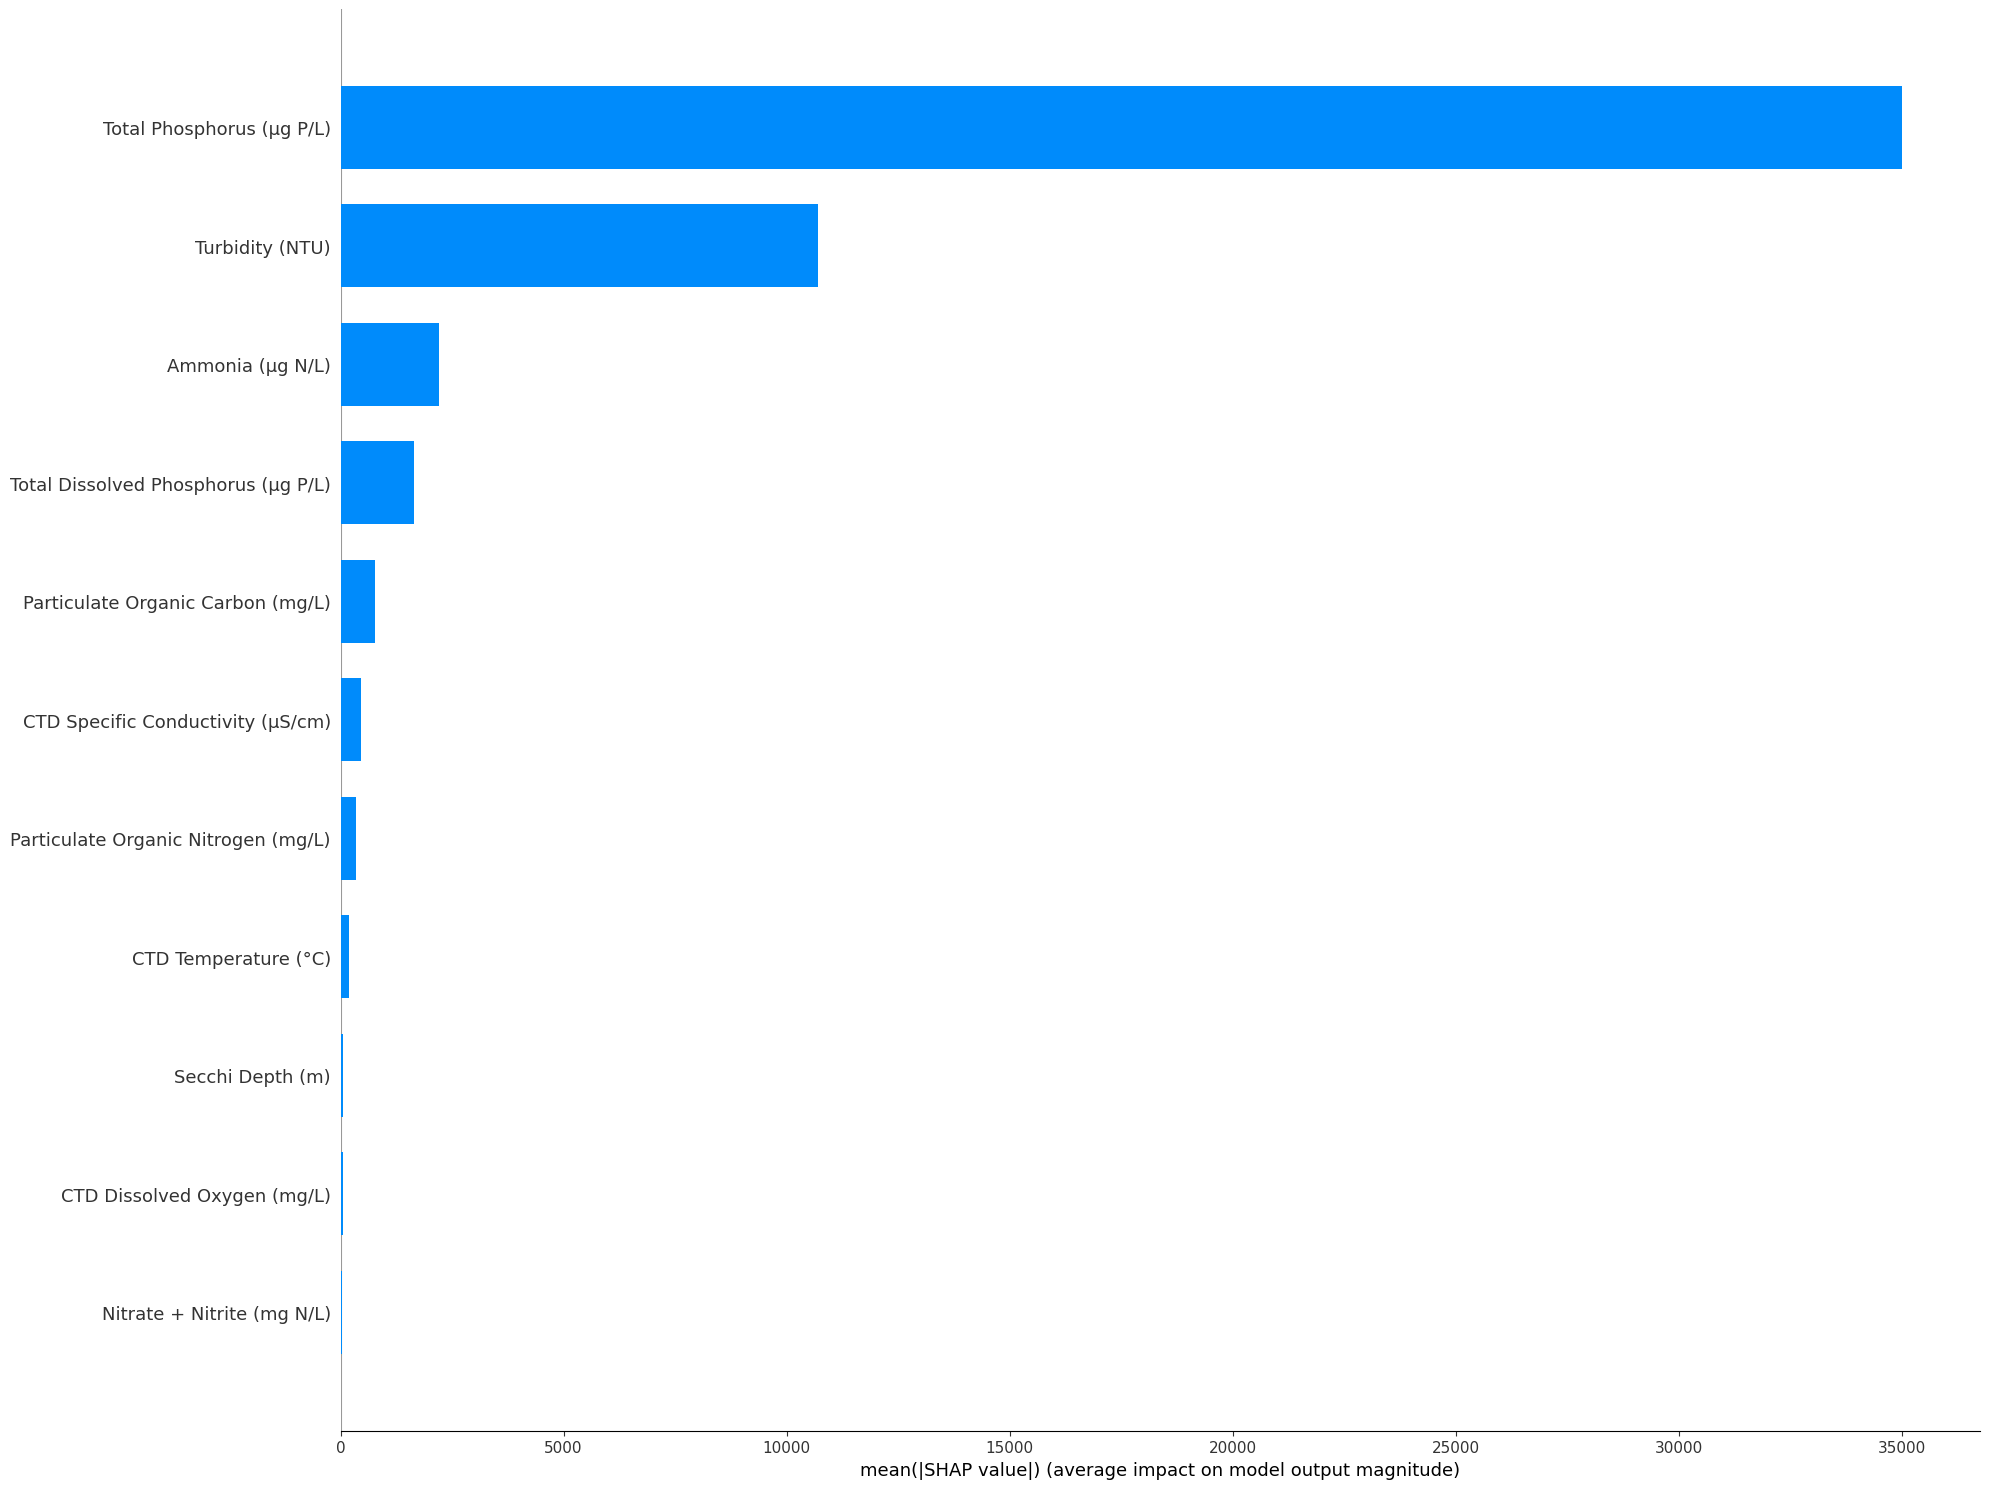

In [26]:
shap.summary_plot(values, X_train,feature_names = features,plot_type="bar",plot_size = (20,15),show=False)

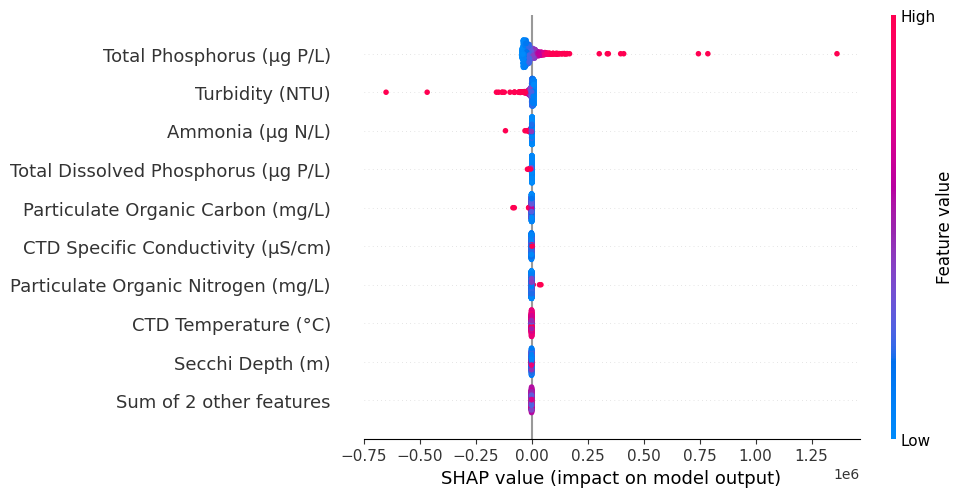

In [27]:
X_test_shap = pd.DataFrame(train.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

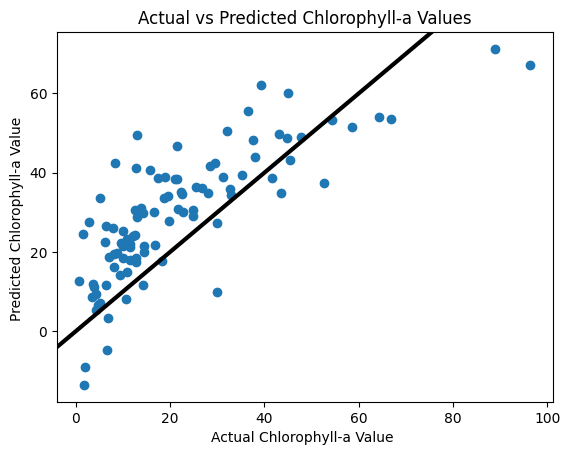

In [28]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()